# Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Importing the Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [3]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [4]:
%matplotlib inline

### Importing the data

In [5]:
df=pd.read_csv('telecom_churn_data.csv')

In [6]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [8]:
data_dict=pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')

In [9]:
data_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [10]:
#numerical columns
num_col=[i for i in df.columns if df[i].dtype!='O']
num_col

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6'

In [11]:
len(num_col)

214

In [12]:
obj_col=[i for i in df.columns if df[i].dtype=='O']
obj_col

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [13]:
#it seems all the obj type columns are dates only. lets try parsing them as datetype
df=pd.read_csv('telecom_churn_data.csv',parse_dates=['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9'])

In [14]:
obj_col=[i for i in df.columns if df[i].dtype=='O']
obj_col

[]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](12), float64(179), int64(35)
memory usage: 172.4 MB


# 1. Data Cleaning, Feature Engineering And EDA

In [16]:
#creating the target variable 'churn' with values 0(non-churn) and 1(churn)
df['churn'] = np.where(df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)

In [17]:
#checking for null values
df.isna().sum()/len(df)*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [18]:
#many columns have really high null values. Lets drop the columns with null values greater than 30%
col_to_be_dropped=[i for i in df.columns if df[i].isna().sum()/len(df)>0.3]

In [19]:
col_to_be_dropped

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [20]:
len(col_to_be_dropped)

40

In [21]:
#dropping the columns with null values>30%
df.drop(col_to_be_dropped,axis=1,inplace=True)

In [22]:
df.shape

(99999, 187)

In [23]:
#checking for null values again
df.isna().sum()/len(df)*100

mobile_number           0.000000
circle_id               0.000000
loc_og_t2o_mou          1.018010
std_og_t2o_mou          1.018010
loc_ic_t2o_mou          1.018010
last_date_of_month_6    0.000000
last_date_of_month_7    0.601006
last_date_of_month_8    1.100011
last_date_of_month_9    1.659017
arpu_6                  0.000000
arpu_7                  0.000000
arpu_8                  0.000000
arpu_9                  0.000000
onnet_mou_6             3.937039
onnet_mou_7             3.859039
onnet_mou_8             5.378054
onnet_mou_9             7.745077
offnet_mou_6            3.937039
offnet_mou_7            3.859039
offnet_mou_8            5.378054
offnet_mou_9            7.745077
roam_ic_mou_6           3.937039
roam_ic_mou_7           3.859039
roam_ic_mou_8           5.378054
roam_ic_mou_9           7.745077
roam_og_mou_6           3.937039
roam_og_mou_7           3.859039
roam_og_mou_8           5.378054
roam_og_mou_9           7.745077
loc_og_t2t_mou_6        3.937039
loc_og_t2t

In [24]:
df[['loc_ic_t2o_mou','loc_og_t2o_mou','std_og_t2o_mou']].value_counts()

loc_ic_t2o_mou  loc_og_t2o_mou  std_og_t2o_mou
0.0             0.0             0.0               98981
dtype: int64

In [25]:
#columns 'loc_ic_t2o_mou','loc_og_t2o_mou','std_og_t2o_mou' have only single value hence no variance.Lets check for other such columns
col_with_0_var=[i for i in df.columns if df[i].std()==0]
col_with_0_var

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [26]:
#in addition to above columns 'last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8','last_date_of_month_9' are also single valued and have no variance
col_with_0_var.extend(['last_date_of_month_6', 'last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'])
col_with_0_var

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9']

In [27]:
#lets drop these columns
df.drop(col_with_0_var,axis=1,inplace=True)

In [28]:
df.shape

(99999, 171)

In [29]:
#checking for null values again
df.isna().sum()/len(df)*100

mobile_number          0.000000
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t2f_mou_6       3.937039
loc_og_t2f_mou_7       3.859039
loc_og_t

In [30]:
#all the remaining columns have very less null values percentage so lets drop them
df.dropna(inplace=True)

In [31]:
df.shape

(84185, 171)

In [32]:
#checking for null values again
df.isna().sum()/len(df)*100

mobile_number          0.0
arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
arpu_9                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
onnet_mou_9            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
offnet_mou_9           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_ic_mou_9          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
roam_og_mou_9          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2t_mou_9       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2m_mou_9       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2f_mou_9       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_t2c_mou_9       0.0
l

In [33]:
#lets get the correlation matrix
cor=df.corr()
cor

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
mobile_number,1.000000,0.011887,0.005305,0.005205,0.009346,-0.001999,-0.008428,-0.009149,-0.010296,0.007884,-0.001473,-0.003170,-0.000657,0.002762,-0.002306,-0.000515,0.001803,0.000591,-0.004687,-0.003818,0.000081,0.035025,0.031598,0.031953,0.029047,0.060436,0.057628,0.059256,0.059352,0.047923,0.046398,0.045764,0.048661,-0.008674,-0.013316,-0.013786,-0.011584,0.062589,0.058777,0.059842,0.058399,-0.024038,-0.029068,-0.028867,-0.028724,-0.031579,-0.036609,-0.039507,-0.039675,0.022174,0.016383,0.021629,0.017119,-0.035777,-0.042485,-0.044283,-0.044135,-0.001834,-0.002504,-0.002680,-0.001531,-0.020589,-0.018020,-0.024748,-0.022314,-0.005644,0.006742,4.286291e-03,0.003106,0.003859,-0.006132,-0.007777,-0.007359,0.018780,0.017408,0.018996,0.016801,0.051104,0.047890,0.044998,0.048108,0.047572,0.047179,0.044527,0.043953,0.052757,0.049860,0.048236,0.049287,-0.004814,-0.003456,-0.006116,-6.325178e-03,-0.009477,-0.012681,-0.015806,-0.011080,0.013963,0.015212,0.014407,0.014777,-0.007415,-0.009165,-0.013002,-0.009127,0.045369,0.041078,0.038677,0.041541,-0.026771,-0.003393,-0.050102,-0.074254,0.009640,0.007465,0.009664,0.009021,0.012482,0.013970,0.009063,0.014328,-0.038548,-0.050498,-0.060230,-0.049500,0.009848,0.005138,0.006476,0.009918,0.050760,0.045797,0.052126,0.050991,0.039298,0.033199,0.045503,0.011613,-0.014874,-1.580256e-02,-0.019813,-0.007597,-0.011015,-0.009442,-6.374772e-03,-0.006746,0.000469,0.001665,-0.000445,0.008698,-0.033978,-0.034302,-0.034170,-0.030379,0.001443,0.001525,0.007343,0.004308,-0.012154,-0.011532,-0.011924,-0.012662,0.317398,-0.024135,-0.022673,-0.024932,-0.009244,-0.

In [34]:
#lets check for highly correlated columns
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
high_cor_df=pd.DataFrame(cor[(cor > 0.70) | (cor < -0.70)].sort_values())
high_cor_df

,,0
std_ic_t2t_mou_9,std_ic_t2t_mou_8,0.700493
total_rech_num_7,total_rech_num_6,0.700835
vol_3g_mb_7,vol_3g_mb_6,0.701444
loc_ic_mou_9,loc_ic_t2t_mou_9,0.702949
sachet_2g_8,sachet_2g_7,0.702980
loc_ic_mou_7,loc_ic_t2t_mou_7,0.703055
loc_ic_t2f_mou_8,loc_ic_t2f_mou_6,0.705801
total_rech_amt_6,arpu_8,0.706215
loc_og_t2f_mou_8,loc_og_t2f_mou_6,0.707543
loc_og_t2t_mou_8,loc_og_t2t_mou_6,0.708922


In [35]:
#lets drop the highly correlated columns
col_to_be_dropped = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','arpu_7','arpu_9','onnet_mou_7','onnet_mou_9','offnet_mou_7','offnet_mou_9']
df.drop(col_to_be_dropped,inplace=True,axis=1)

In [36]:
df.shape

(84185, 113)

<AxesSubplot:>

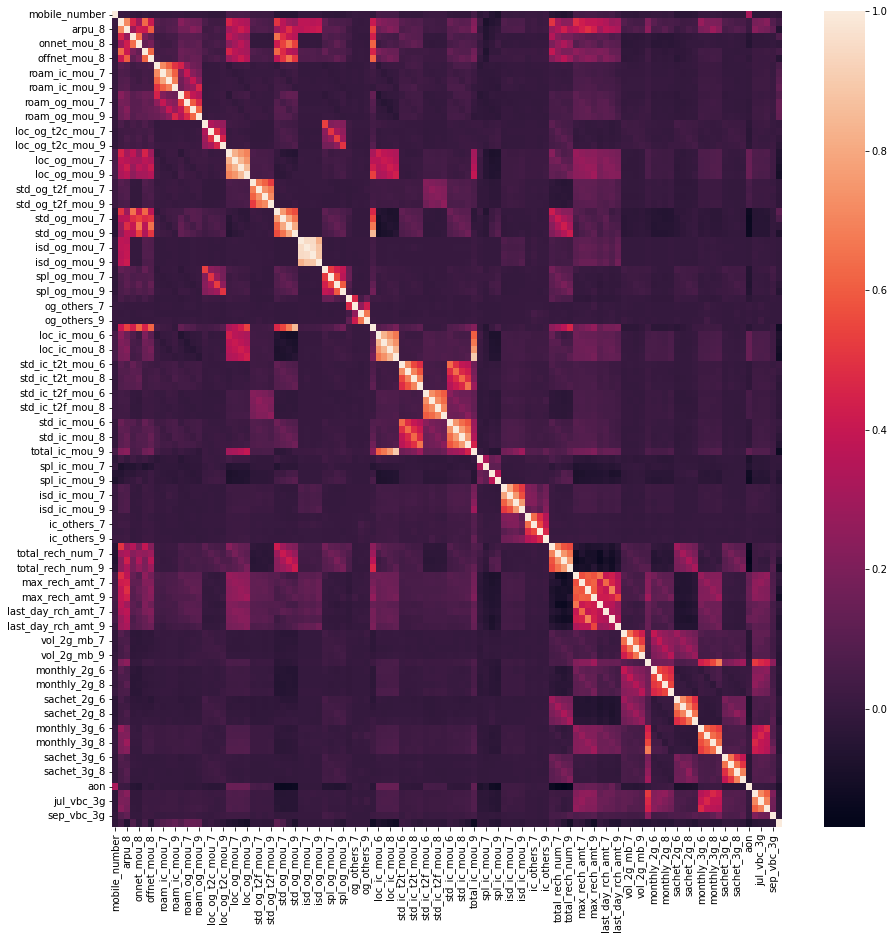

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

In [38]:
#lets check for date columns
date_col=[i for i in df.columns if df[i].dtype=='datetime64[ns]']

In [39]:
date_col

['date_of_last_rech_9']

In [40]:
df['date_of_last_rech_9_day']=df['date_of_last_rech_9'].dt.day.astype('int')

In [41]:
df.drop('date_of_last_rech_9',axis=1,inplace=True)

In [42]:
#dropping mobile number as it is an identifier
df.drop('mobile_number',axis=1,inplace=True)

In [43]:
df.shape

(84185, 112)

In [44]:
#lets check the distributon of target
df.churn.value_counts()

0    81753
1     2432
Name: churn, dtype: int64

<BarContainer object of 2 artists>

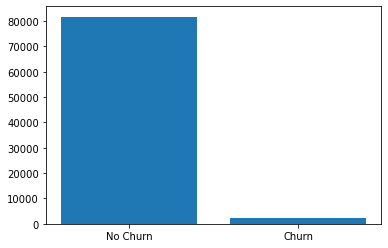

In [45]:
plt.bar(['No Churn', 'Churn'],df.churn.value_counts())

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

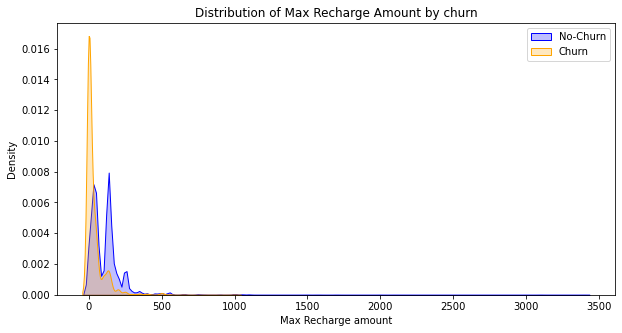

In [46]:
# churn vs max rechare amount
plt.figure(figsize=(10,5))
ax = sns.kdeplot(df.max_rech_amt_9[(df["churn"] == 0)],
                color="blue", shade = True)
ax = sns.kdeplot(df.max_rech_amt_9[(df["churn"] == 1)],
                ax =ax, color="orange", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Max Recharge amount')
ax.set_title('Distribution of Max Recharge Amount by churn')

Text(0.5, 1.0, 'Churn Vs AON')

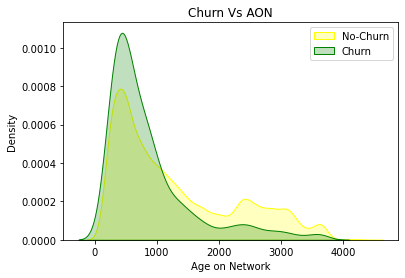

In [47]:
# churn Vs aon
ax = sns.kdeplot(df.aon[(df["churn"] == 0)],
                color="yellow", shade = True)
ax = sns.kdeplot(df.aon[(df["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Age on Network')
ax.set_title('Churn Vs AON')

Text(0.5, 1.0, 'Distribution of Volume based cost by churn')

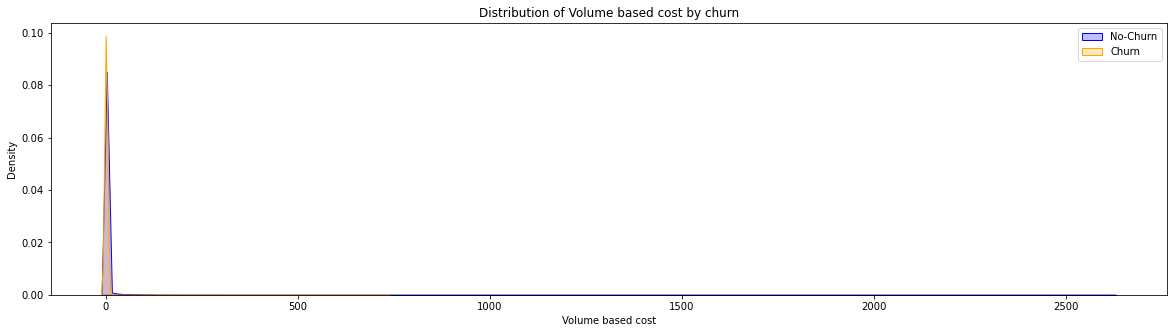

In [48]:
# churn vs Value based cost
plt.figure(figsize=(20,5))
ax = sns.kdeplot(df.sep_vbc_3g[(df["churn"] == 0)],
                color="blue", shade = True)
ax = sns.kdeplot(df.sep_vbc_3g[(df["churn"] == 1)],
                ax =ax, color="orange", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Volume based cost by churn')

<AxesSubplot:>

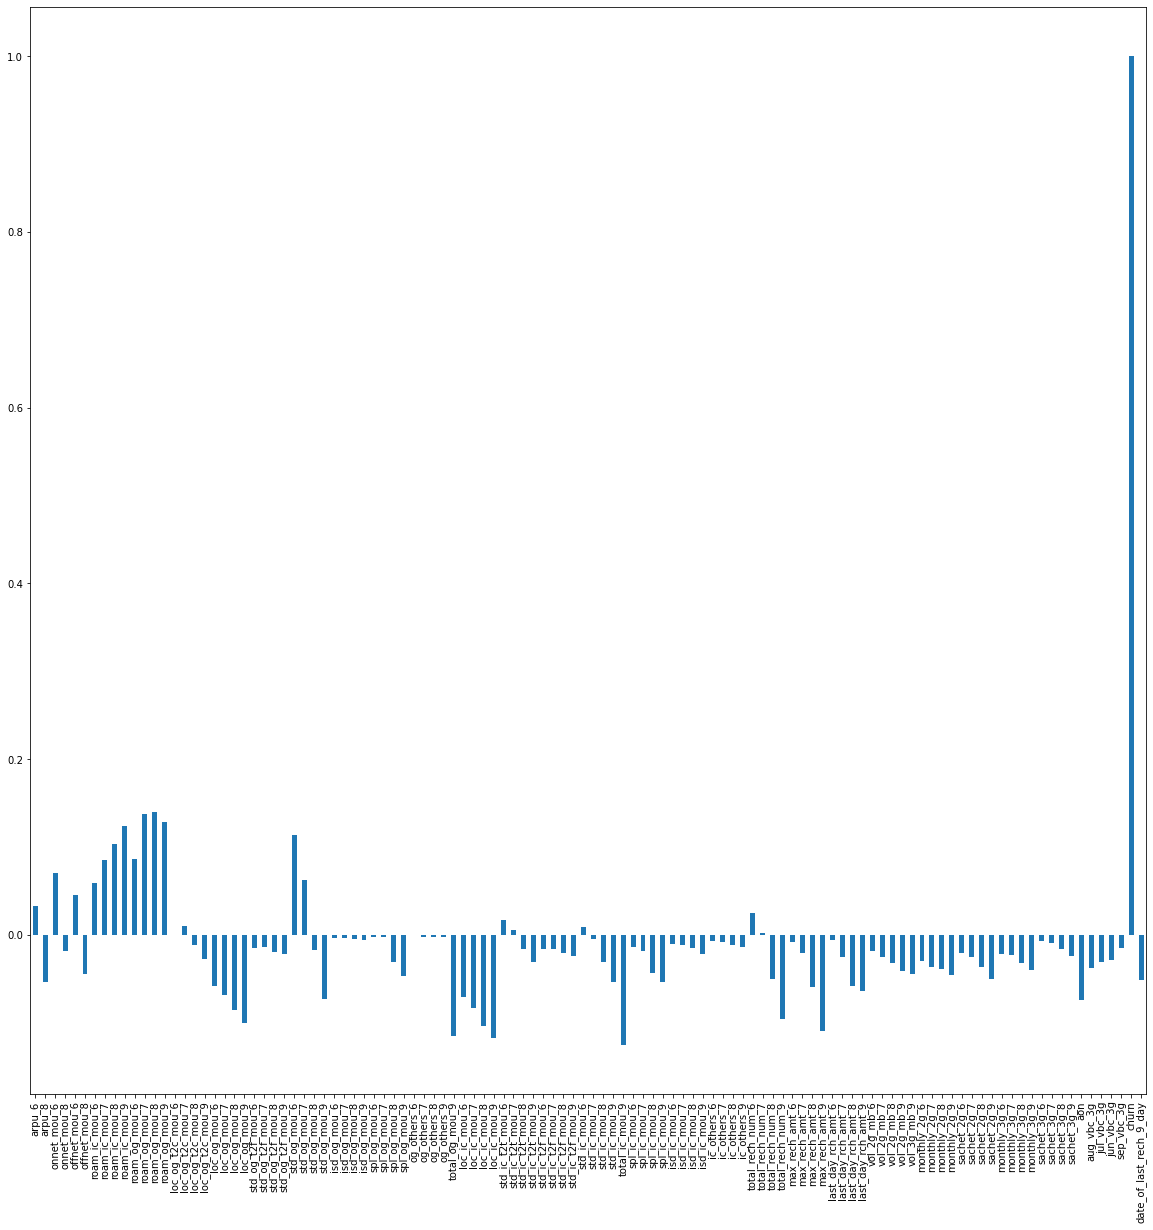

In [49]:
# Checking Correlation of churn with other columns
plt.figure(figsize=(20,20))
df.corr()['churn'].plot(kind='bar')

# Modelling

In [50]:
# dividing data into feature matrix and label
X=df.drop('churn',axis=1)
y=df.churn

In [51]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [52]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((67348, 111), (16837, 111), (67348,), (16837,))

In [53]:
# Balancing the Data Set as ther huge class imbalance
#we wil use SMOTE technique for balancing 
from imblearn.over_sampling import SMOTE
balancer = SMOTE(sampling_strategy = "auto",random_state=0,n_jobs=-1)
Xtrain_b,ytrain_b = balancer.fit_resample(Xtrain,ytrain)

In [54]:
Xtrain_b.shape,ytrain_b.shape

((130828, 111), (130828,))

In [55]:
ytrain_b.value_counts()

0    65414
1    65414
Name: churn, dtype: int64

In [56]:
# Lets apply pca for feature reduction. But before that we have to scale the data.We will apply the standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xtrain_b=scaler.fit_transform(Xtrain_b)
Xtest=scaler.transform(Xtest)

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca=PCA()
Xtrain_pca=pca.fit_transform(Xtrain_b)

<BarContainer object of 111 artists>

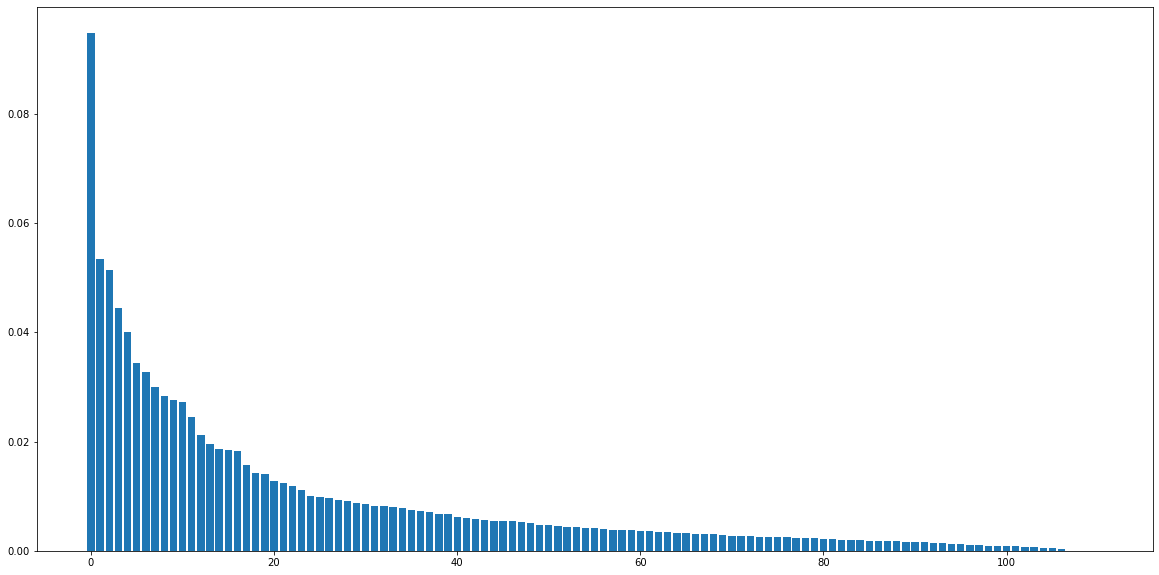

In [59]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(df.columns)-1),pca.explained_variance_ratio_)

In [60]:
#number of components explaining 95% variance
s=0
for i in range(len(pca.explained_variance_ratio_)):
    s+=pca.explained_variance_ratio_[i]
    if s>.95:
        break
i

74

In [61]:
# 95% can be explained by 74 components
pca=PCA(n_components=74,random_state=0)
Xtrain_pca=pca.fit_transform(Xtrain_b)
Xtest_pca=pca.transform(Xtest)

In [62]:
Xtrain_pca.shape

(130828, 74)

In [73]:
#Building a randomforest
model=RandomForestClassifier(random_state=0,n_jobs=-1)

In [74]:
#model with pca
model.fit(Xtrain_pca,ytrain_b)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [75]:
model.score(Xtrain_pca,ytrain_b)

1.0

In [76]:
model.score(Xtest_pca,ytest)

0.9739264714616618

In [77]:
preds=model.predict(Xtest_pca)

In [78]:
recall_score(ytest,preds), precision_score(ytest,preds)

(0.6947791164658634, 0.5466034755134281)

In [79]:
#model without pca
model=RandomForestClassifier(random_state=0,n_jobs=-1)
model.fit(Xtrain_b,ytrain_b)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [80]:
model.score(Xtrain_b,ytrain_b)

1.0

In [81]:
model.score(Xtest,ytest)

1.0

In [83]:
preds=model.predict(Xtest)

In [84]:
recall_score(ytest,preds), precision_score(ytest,preds)

(1.0, 1.0)

In [85]:
imp_df=pd.DataFrame({'Col':X.columns,'Imp':model.feature_importances_})
imp_df.sort_values('Imp',inplace=True,ascending=False)
imp_df.reset_index(drop=True)

,Col,Imp
0,loc_ic_mou_9,1.392635e-01
1,total_og_mou_9,1.214918e-01
2,total_ic_mou_9,1.203888e-01
3,roam_ic_mou_9,1.188678e-01
4,roam_og_mou_8,6.806607e-02
5,loc_og_mou_9,6.358924e-02
6,roam_og_mou_9,5.861454e-02
7,roam_ic_mou_8,5.655940e-02
8,std_ic_mou_9,4.434083e-02
9,std_og_mou_9,3.115922e-02


<AxesSubplot:xlabel='Col'>

<Figure size 1440x720 with 0 Axes>

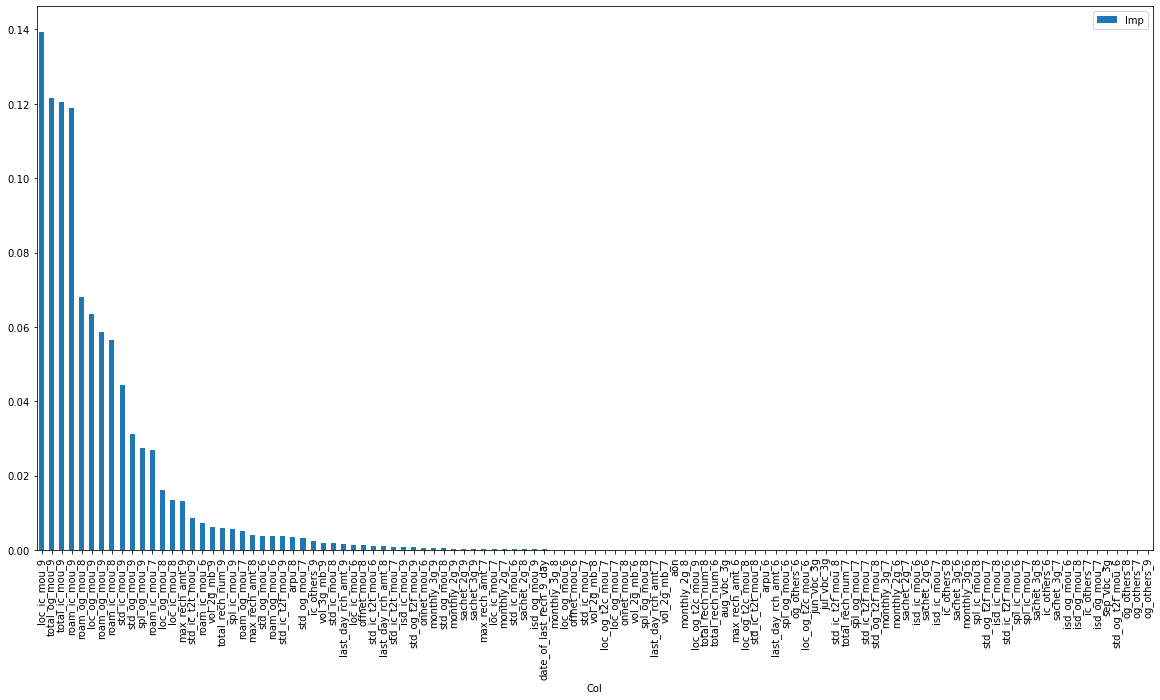

In [86]:
plt.figure(figsize=(20,10))
imp_df.plot.bar(x='Col',y='Imp',figsize=(20,10))

**It seems random forest classifier without pca classify all the samples perfectly.**

### Top Ten Important features 

1. loc_ic_mou_9
2. total_og_mou_9
3. total_ic_mou_9
4. roam_ic_mou_9
5. roam_og_mou_8
6. loc_og_mou_9
7. roam_og_mou_9
8. roam_ic_mou_8
9. std_ic_mou_9
10. std_og_mou_9

## Inferences

1. The customers with age on network 0-1500 days are more likely to churn which implies higher age on network customers are less likely to churn.So we can target new customers and provide them some offers and discounts such that they will not churn.
2. Customers with low minutes of incoming local calls and outgoing ISD calls in the september are more likely to churn. Therefore need to target these customers as well.
3. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
4. The customers whose roaming outgoing minutes of usage is increasing are more likely to churn.
5. Customers, whose monthly 3G recharge in August is more, are likely to be churned.
6. Customers decreasing monthly 2g usage for August are most probable to churn.

So we can provide some discounts and special offers to the customers who are more likely to be churned. Also we can compare the offers provided by other similiar companies and try to provide a better solution so that customers will be satisfied with the service and will not churn.